In [1]:
import os

import cv2

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

%matplotlib inline

In [2]:
DATA_PATH = "../data/sunspots/"
TEST_FILE = os.path.join(DATA_PATH, "sunspots_1024_20130405.jpg")

In [3]:
#img = mpimg.imread(TEST_FILE)
img = cv2.imread(TEST_FILE,0)
img.shape

(1024, 1024)

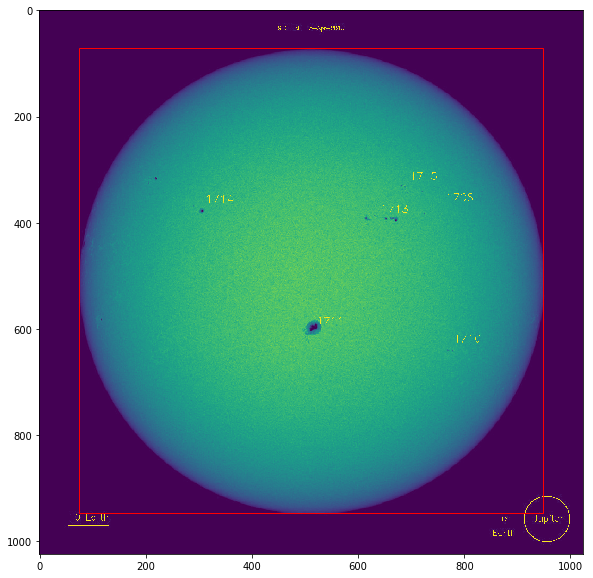

In [4]:
fig, ax = plt.subplots(1, figsize=(10,10))

x, y, h, w = 74, 71, 875, 875
rect = patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)

plt.imshow(img)

In [5]:
img = img[y:y+h, x:x+w]
img = cv2.medianBlur(img,5)

[[[442 526  13]
  [232 308   4]]]


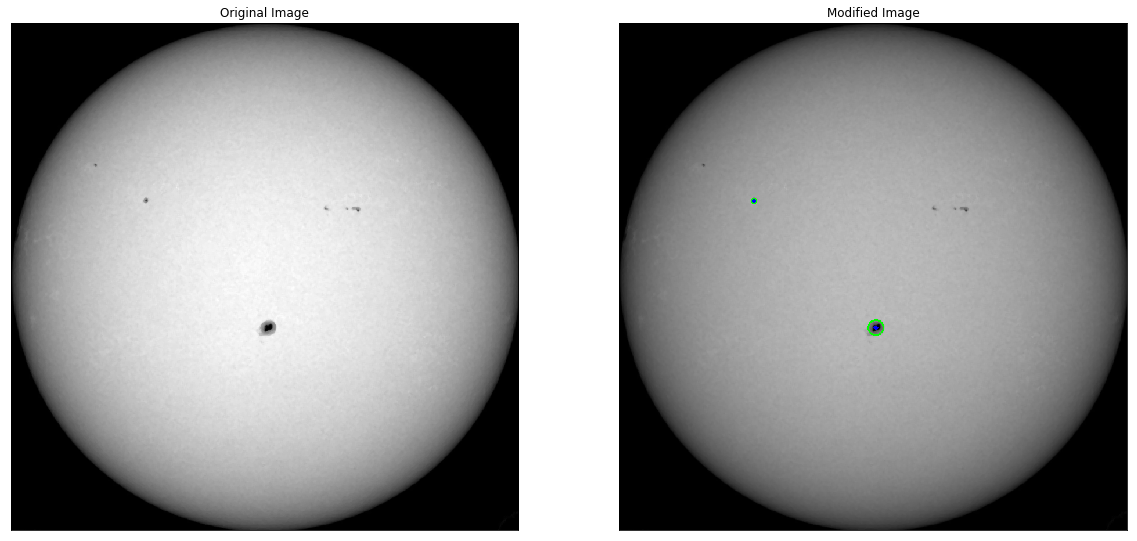

In [6]:
cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,10,
                            param1=50,param2=12,minRadius=0,maxRadius=20)

circles = np.uint16(np.around(circles))
print(circles)
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

f, axs = plt.subplots(figsize=(20,20))
plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(cimg, cmap = 'gray')
plt.title('Modified Image'), plt.xticks([]), plt.yticks([])

plt.show()

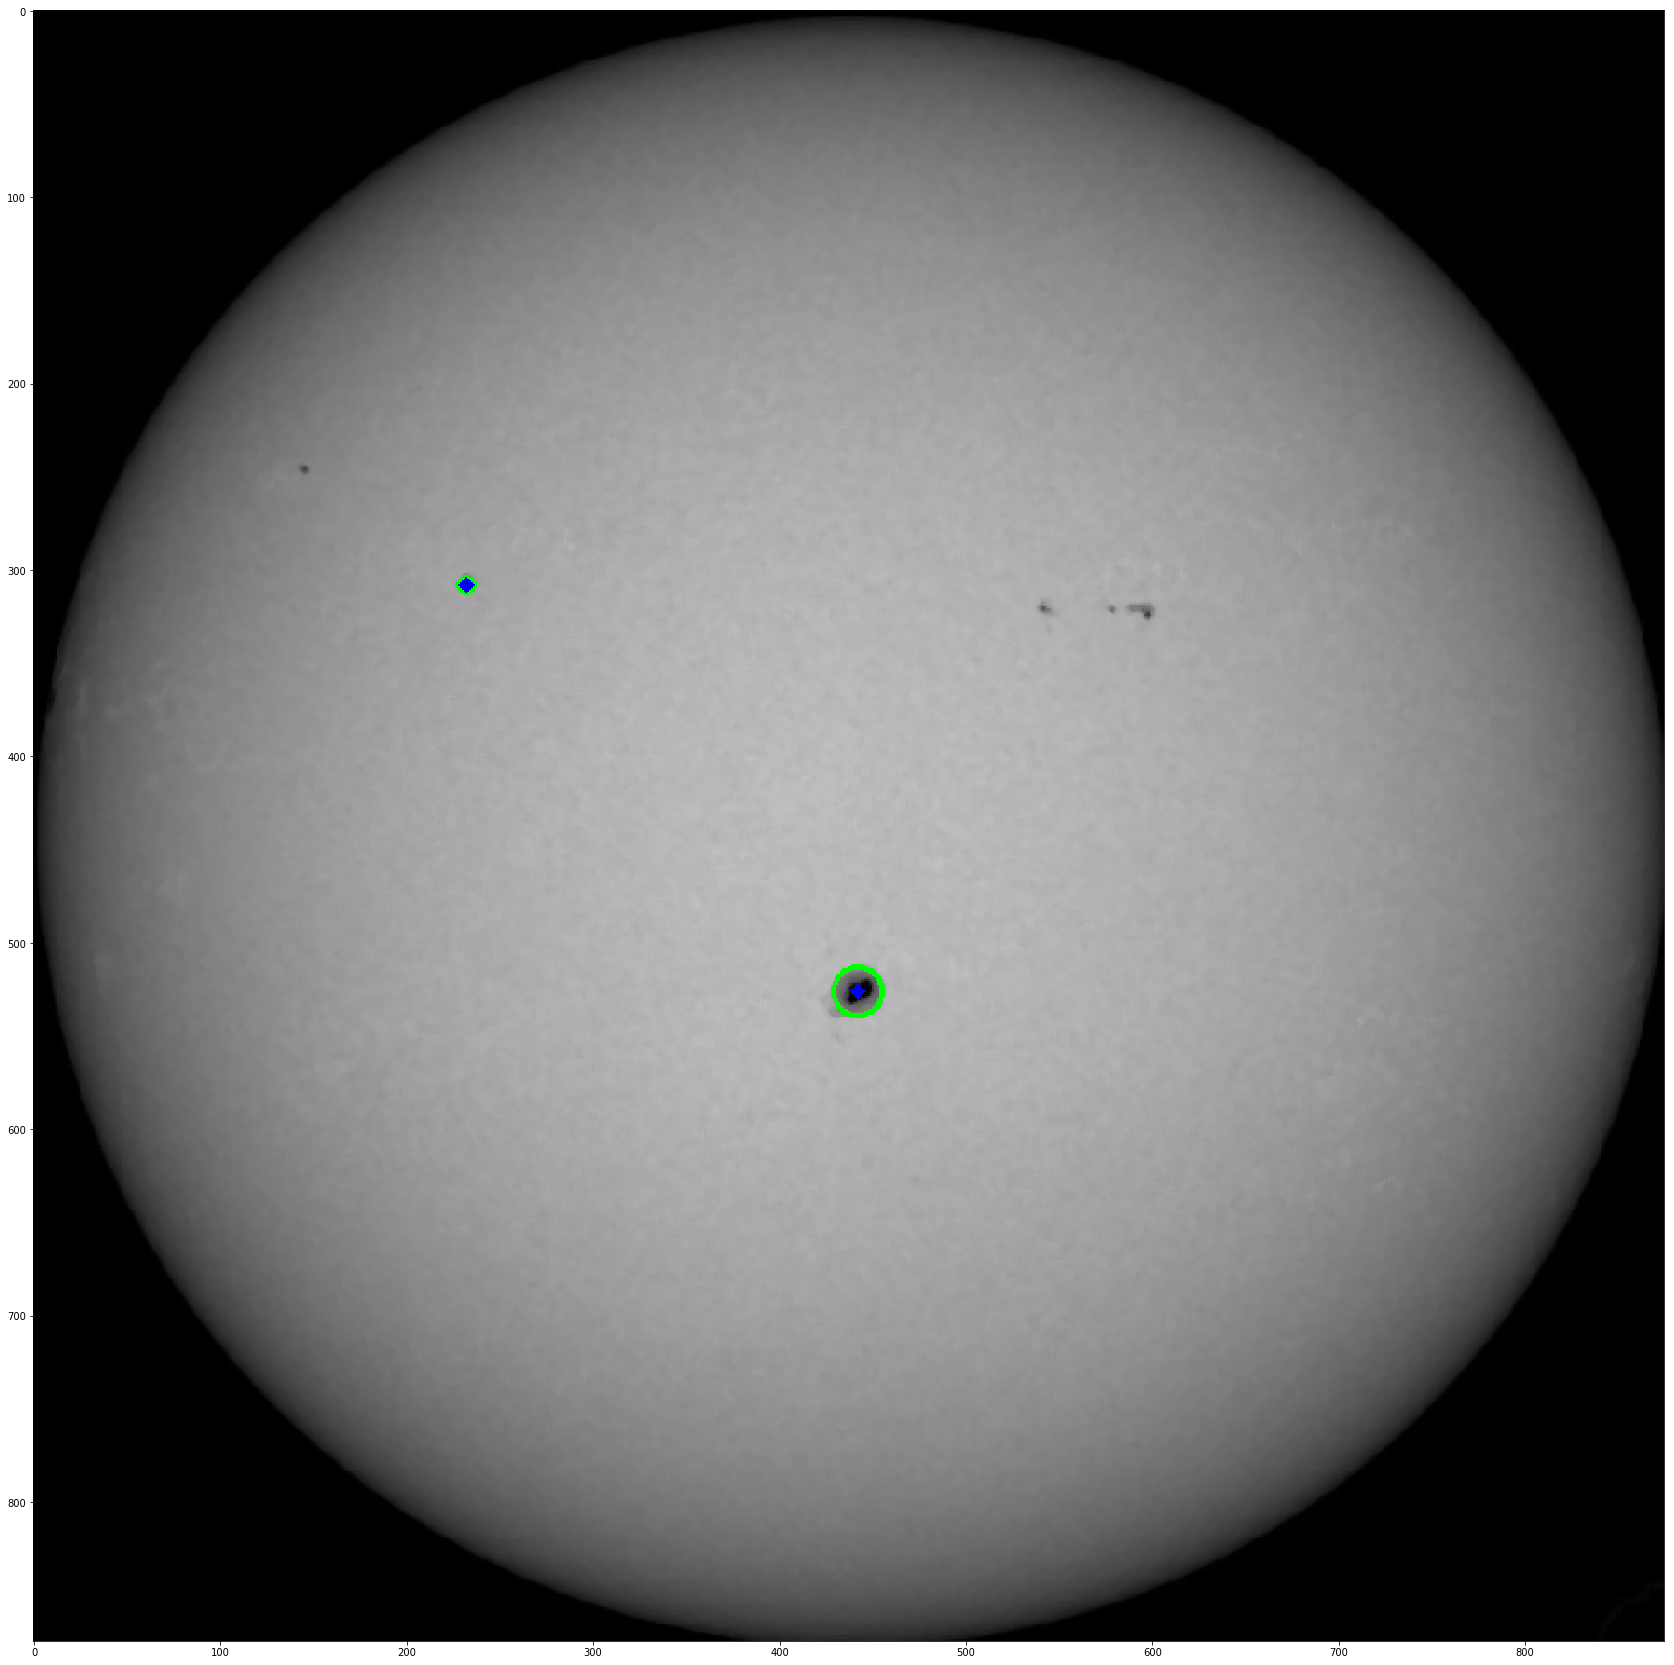

In [7]:
plt.figure(figsize=(30,30))
plt.imshow(cimg, cmap = 'gray')